#### Part 1. Training word2vec.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim

# Loading and preprocessing data.
tweets = pd.read_csv('tweets.csv')
tweets_text = [gensim.utils.simple_preprocess(text) for text in tweets['text']]

# Removing the stopwords.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tweets_final = []
for sent in tweets_text:
    sent_filtered = [w for w in sent if not w in stop_words]
    tweets_final.append(sent_filtered)

# Training Word2Vec model.
w2v = gensim.models.Word2Vec(tweets_final,
                             size=150,
                             window=7,
                             min_count=50,
                             workers=10)                         
w2v.train(tweets_final, total_examples=len(tweets_final), epochs=20)

# Getting the vector data.
labels = []
tokens = []
for word in w2v.wv.vocab:
    tokens.append(w2v[word])
    labels.append(word)

C:\Users\Jurgis\AppData\Local\conda\conda\envs\data_science\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\Jurgis\AppData\Local\conda\conda\envs\data_science\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


#### Part 2. Clustering BEFORE applying t-SNE.

In [2]:
# Clustering.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=15)

tokens = pd.DataFrame(tokens) # Columns indicate vector position in dimension n.

km.fit(tokens)

tokens.shape

# Getting the clusters.
classes = km.labels_

#### Applying t-SNE and visualizing the clusters.

In [3]:
# Creating TSNE model.
from sklearn.manifold import TSNE

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

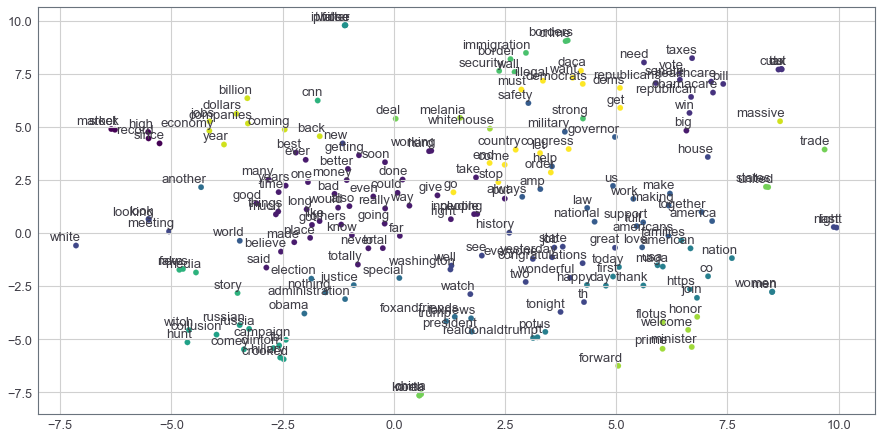

In [4]:
# Plotting and inspecting the clusters: if they're visually separable, then it's k.
from jupyterthemes import jtplot
jtplot.style('grade3')

plt.subplots(figsize=(15, 7.5))
plt.scatter(x, y, c=classes)

for i in range(len(x)):
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')


Well, fuck.

But to be fair, just like my initial hypothesis, despite the middle being noisy, edges show some potential. Colors used here are repeating (n_cluster=15). 